In [85]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split

## kmeans - interpretacion del artista

In [23]:
df = pd.read_csv("cardsNuevo.csv",sep = ',')

In [24]:
df.head()

,Unnamed: 0,CP_CLIENTE,CP_COMERCIO,SECTOR,DIA,FRANJA_HORARIA,IMPORTE,NUM_OP
0,0,4007,4006,ALIMENTACION,2015-09-05,08-10,297.05,10
1,1,4007,4006,ALIMENTACION,2015-04-20,14-16,494.23,17
2,2,4007,4006,ALIMENTACION,2015-06-04,10-12,1694.15,57
3,3,4002,4009,ALIMENTACION,2015-12-05,20-22,79.71,2
4,4,4002,4007,ALIMENTACION,2015-03-07,20-22,181.28,3


In [25]:
del(df['DIA'])
del(df['FRANJA_HORARIA'])
del(df['SECTOR'])

In [26]:
newdf = df[["NUM_OP", "IMPORTE"]].dropna()

In [27]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

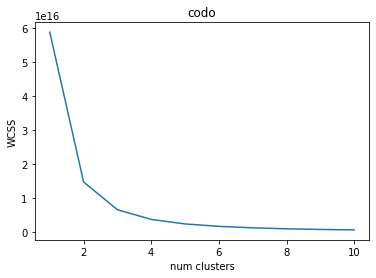

In [28]:
plt.plot(range(1,11), wcss)
plt.title('codo')
plt.xlabel('num clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(newdf)
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1]), array([863615,  26995], dtype=int64))

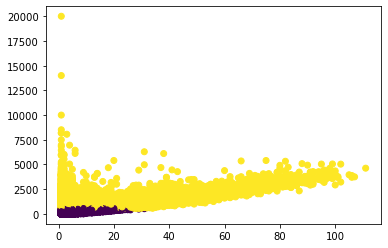

In [31]:
plt.scatter(newdf["NUM_OP"], newdf["IMPORTE"], c= kmeans.labels_)
plt.show()

In [32]:
kmeans.cluster_centers_

array([[   1.94953198,   81.49925445],
       [  17.15336313, 1028.80626233]])

In [33]:
alldf = pd.read_csv("cardsNuevo.csv", sep=',')[["NUM_OP", "IMPORTE"]].dropna()

In [34]:
kmeans.predict(alldf)[0:100]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## regresion lineal - jueves direccion del viento suroeste

In [35]:
from sklearn import datasets, linear_model

In [42]:
weather = pd.read_csv("weather.csv",sep = ';')

<AxesSubplot:xlabel='Precip', ylabel='TMed'>

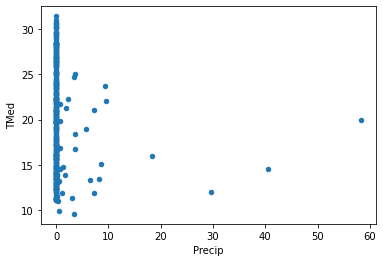

In [67]:
weather.plot(kind='scatter', x='Precip', y='TMed')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(weather.TMax, weather.HumMax)

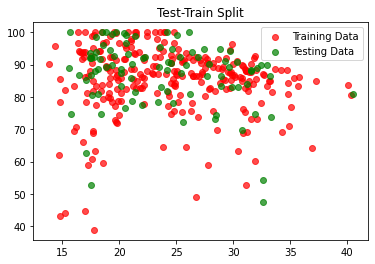

In [55]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test-Train Split')
plt.show()

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train.values)

LinearRegression()

In [57]:
prediction = lr.predict(X_test.values.reshape(-1,1))

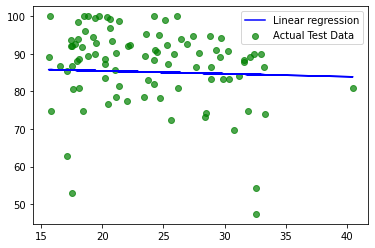

In [58]:
plt.plot(X_test, prediction, label='Linear regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

## regresion logistica -

In [75]:
weather = pd.read_csv("weather.csv",sep = ';')

In [76]:
weather.head(2)

,FECHA,DIA,TMax,HTMax,TMin,HTMin,TMed,HumMax,HumMin,HumMed,VelViento,DirViento,Rad,Precip,ETo
0,2015-12-30,365,19.2,12:02,8.6,4:06,13.9,98.8,49.3,71.4,0.6,337.2,9.9,0.0,1.04
1,2015-12-29,363,18.8,12:38,10.4,4:32,14.2,100.0,64.7,81.2,1.0,292.7,8.5,0.0,1.07


In [77]:
del(weather['FECHA'])
del(weather['HTMax'])
del(weather['HTMin'])

In [78]:
weather.head(2)

,DIA,TMax,TMin,TMed,HumMax,HumMin,HumMed,VelViento,DirViento,Rad,Precip,ETo
0,365,19.2,8.6,13.9,98.8,49.3,71.4,0.6,337.2,9.9,0.0,1.04
1,363,18.8,10.4,14.2,100.0,64.7,81.2,1.0,292.7,8.5,0.0,1.07


In [79]:
del(weather['TMax'])
del(weather['TMin'])
del(weather['HumMin'])
del(weather['HumMax'])
del(weather['DirViento'])
del(weather['Rad'])
del(weather['ETo'])

In [94]:
weather.head(20)

,DIA,HumMed,VelViento,Precip,TMed
0,365,71.4,0.6,0.0,13.9
1,363,81.2,1.0,0.0,14.2
2,364,70.2,1.2,0.0,14.4
3,362,66.1,1.2,0.0,15.8
4,361,61.1,2.0,0.0,15.8
5,360,70.2,1.2,0.0,15.0
6,359,68.6,1.4,0.0,14.7
7,358,72.7,1.2,0.0,13.8
8,357,75.3,1.3,0.0,14.1
9,356,73.2,1.1,0.0,14.7


In [91]:
weather = weather.reindex(columns = ['DIA','HumMed','VelViento','Precip','TMed'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(weather.drop('TMed', axis=1), weather['TMed'])

In [86]:
lr = LogisticRegression()

In [90]:
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
lr.predict(np.array([[98,70.2,2.0,0.0]]))[0]

18.63651219295343

In [103]:
lr.predict(np.array([[300,29.9,3.0,2.0]]))[0]

24.815293018254394